EDA and preprocessing

In [ ]:
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
cols_to_keep = ['Country Name', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']

#education attainment
lower_secondary_og = pd.read_csv('data/attain_lower_secondary.csv', skiprows=3, header=1, usecols=cols_to_keep)
upper_secondary_og = pd.read_csv('data/attain_upper_secondary.csv', skiprows=2, header=1, usecols=cols_to_keep)
bachelors_og = pd.read_csv('data/attain_bachelors.csv', skiprows=3, header=1, usecols=cols_to_keep)
masters_og = pd.read_csv('data/attain_masters.csv', skiprows=3, header=1, usecols=cols_to_keep)
doctoral_og = pd.read_csv('data/attain_doctoral.csv', skiprows=3, header=1, usecols=cols_to_keep)

#Country Data GDP
gdp_millions_og = pd.read_csv('data/country_gdp_millions.csv', skiprows=3, header=1, usecols=cols_to_keep)

In [ ]:
#restructure the required data.

lower_secondary = lower_secondary_og.melt(id_vars=['Country Name'], var_name="Year", value_name="LowerSecondaryAttainment")
upper_secondary = upper_secondary_og.melt(id_vars=['Country Name'], var_name="Year", value_name="UpperSecondaryAttainment")
bachelors = bachelors_og.melt(id_vars=['Country Name'], var_name="Year", value_name="BachelorsAttainment")
masters = masters_og.melt(id_vars=['Country Name'], var_name="Year", value_name="MastersAttainment")
doctoral = doctoral_og.melt(id_vars=['Country Name'], var_name="Year", value_name="DoctoralAttainment")

gdp_millions = gdp_millions_og.melt(id_vars=['Country Name'], var_name="Year", value_name="GDP_Millions")

In [ ]:
lower_secondary.head()

,Country Name,Year,LowerSecondaryAttainment
0,Aruba,2001,NaN
1,Africa Eastern and Southern,2001,NaN
2,Afghanistan,2001,NaN
3,Africa Western and Central,2001,NaN
4,Angola,2001,NaN


In [ ]:
upper_secondary.head()

,Country Name,Year,UpperSecondaryAttainment
0,Aruba,2001,NaN
1,Africa Eastern and Southern,2001,NaN
2,Afghanistan,2001,NaN
3,Africa Western and Central,2001,NaN
4,Angola,2001,NaN


In [ ]:
bachelors.head()

,Country Name,Year,BachelorsAttainment
0,Aruba,2001,NaN
1,Africa Eastern and Southern,2001,NaN
2,Afghanistan,2001,NaN
3,Africa Western and Central,2001,NaN
4,Angola,2001,NaN


In [ ]:
masters.head()

,Country Name,Year,MastersAttainment
0,Aruba,2001,NaN
1,Africa Eastern and Southern,2001,NaN
2,Afghanistan,2001,NaN
3,Africa Western and Central,2001,NaN
4,Angola,2001,NaN


In [ ]:
doctoral.head()

,Country Name,Year,DoctoralAttainment
0,Aruba,2001,NaN
1,Africa Eastern and Southern,2001,NaN
2,Afghanistan,2001,NaN
3,Africa Western and Central,2001,NaN
4,Angola,2001,NaN


In [ ]:
#GDP in millions of USD
gdp_millions.head()

,Country Name,Year,GDP_Millions
0,Aruba,2001,1.920112e+09
1,Africa Eastern and Southern,2001,2.414727e+11
2,Afghanistan,2001,NaN
3,Africa Western and Central,2001,1.418625e+11
4,Angola,2001,8.936064e+09


In [ ]:
#Merging data into one DataFrame on Country and year.

df= lower_secondary.merge(upper_secondary, on=['Country Name', 'Year'], how='inner')
df = df.merge(bachelors, on= ['Country Name', 'Year'], how='inner')
df = df.merge(masters, on= ['Country Name', 'Year'], how='inner')
df = df.merge(doctoral, on= ['Country Name', 'Year'], how='inner')

df= df.merge(gdp_millions, on= ['Country Name', 'Year'], how='inner')

In [ ]:
df.sort_values(by='DoctoralAttainment', ascending=False).head(30)

,Country Name,Year,LowerSecondaryAttainment,UpperSecondaryAttainment,BachelorsAttainment,MastersAttainment,DoctoralAttainment,GDP_Millions
3495,Switzerland,2014,97.020653,84.643852,35.605011,18.198759,2.97441,7.343966e+11
4559,Switzerland,2018,97.085258,85.681770,NaN,19.968210,2.93416,7.358892e+11
4027,Switzerland,2016,96.890182,84.536911,NaN,18.941710,2.90631,6.956007e+11
3761,Switzerland,2015,97.093933,85.190010,36.949291,19.010530,2.90017,7.021496e+11
4478,Slovenia,2017,97.772781,82.560631,20.681210,15.322310,2.75572,4.846659e+10
3998,United Arab Emirates,2016,70.710388,53.070511,31.690479,15.693130,2.53629,3.570451e+11
4212,Slovenia,2016,97.620468,81.868843,19.643311,14.654430,2.30224,4.473633e+10
4773,United States,2018,96.029373,89.805359,34.992470,13.050380,2.03265,2.061186e+13
4241,United States,2016,95.585243,89.092361,33.439690,12.614010,1.85372,1.874508e+13
3709,United States,2014,95.263474,88.313583,31.955799,11.765360,1.76948,1.752716e+13


In [ ]:
df.describe()

,LowerSecondaryAttainment,UpperSecondaryAttainment,BachelorsAttainment,MastersAttainment,DoctoralAttainment,GDP_Millions
count,859.000000,892.000000,395.000000,313.000000,266.000000,4.815000e+03
mean,67.347947,54.028222,16.953988,6.017786,0.549386,2.021519e+12
std,24.973076,24.312810,9.409896,5.871226,0.553637,7.300274e+12
min,2.036170,0.495100,0.000000,0.000000,0.000000,1.319654e+07
25%,49.352505,33.742116,9.868765,1.406010,0.165848,6.030060e+09
50%,69.974228,56.564384,16.016060,2.944240,0.426045,3.847452e+10
75%,90.304523,75.622433,23.706759,10.866280,0.754873,4.425368e+11
max,100.000000,97.399788,59.260880,28.150810,2.974410,8.760777e+13


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5054 entries, 0 to 5053
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country Name              5054 non-null   object 
 1   Year                      5054 non-null   object 
 2   LowerSecondaryAttainment  859 non-null    float64
 3   UpperSecondaryAttainment  892 non-null    float64
 4   BachelorsAttainment       395 non-null    float64
 5   MastersAttainment         313 non-null    float64
 6   DoctoralAttainment        266 non-null    float64
 7   GDP_Millions              4815 non-null   float64
dtypes: float64(6), object(2)
memory usage: 355.4+ KB


In [ ]:
df['Year'] = df['Year'].astype('int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5054 entries, 0 to 5053
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country Name              5054 non-null   object 
 1   Year                      5054 non-null   int64  
 2   LowerSecondaryAttainment  859 non-null    float64
 3   UpperSecondaryAttainment  892 non-null    float64
 4   BachelorsAttainment       395 non-null    float64
 5   MastersAttainment         313 non-null    float64
 6   DoctoralAttainment        266 non-null    float64
 7   GDP_Millions              4815 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 355.4+ KB


In [ ]:
df.sort_values(by='GDP_Millions', ascending=False).head(20)

,Country Name,Year,LowerSecondaryAttainment,UpperSecondaryAttainment,BachelorsAttainment,MastersAttainment,DoctoralAttainment,GDP_Millions
5047,World,2019,NaN,NaN,NaN,NaN,NaN,8.760777e+13
4781,World,2018,NaN,NaN,NaN,NaN,NaN,8.634351e+13
4515,World,2017,NaN,NaN,NaN,NaN,NaN,8.132672e+13
3717,World,2014,NaN,NaN,NaN,NaN,NaN,7.946886e+13
3451,World,2013,NaN,NaN,NaN,NaN,NaN,7.733191e+13
4249,World,2016,NaN,NaN,NaN,NaN,NaN,7.641725e+13
3983,World,2015,NaN,NaN,NaN,NaN,NaN,7.523360e+13
3185,World,2012,NaN,NaN,NaN,NaN,NaN,7.517281e+13
2919,World,2011,NaN,NaN,NaN,NaN,NaN,7.347986e+13
2653,World,2010,NaN,NaN,NaN,NaN,NaN,6.616266e+13


In [ ]:
df.columns

Index(['Country Name', 'Year', 'LowerSecondaryAttainment',
       'UpperSecondaryAttainment', 'BachelorsAttainment', 'MastersAttainment',
       'DoctoralAttainment', 'GDP_Millions'],
      dtype='object')

In [ ]:
#Perfom listwise deletion for all 
# If all the columns int he subset have null vlaues in them, then we are dropping them.
df1 = df.dropna(axis=0, how='all', subset=['LowerSecondaryAttainment',
       'UpperSecondaryAttainment', 'BachelorsAttainment', 'MastersAttainment',
       'DoctoralAttainment'])

df1.sort_values(by="GDP_Millions", ascending=False).head(50)

,Country Name,Year,LowerSecondaryAttainment,UpperSecondaryAttainment,BachelorsAttainment,MastersAttainment,DoctoralAttainment,GDP_Millions
4773,United States,2018,96.029373,89.805359,34.992470,13.05038,2.03265,2.061186e+13
4241,United States,2016,95.585243,89.092361,33.439690,12.61401,1.85372,1.874508e+13
3975,United States,2015,95.334969,88.411972,32.500759,11.99485,1.70131,1.823830e+13
3709,United States,2014,95.263474,88.313583,31.955799,11.76536,1.76948,1.752716e+13
3443,United States,2013,95.204529,88.150307,31.660660,11.56644,1.67716,1.678485e+13
3177,United States,2012,94.984489,87.679100,NaN,NaN,NaN,1.619701e+13
2911,United States,2011,94.902733,87.590889,NaN,NaN,NaN,1.554258e+13
2645,United States,2010,94.769501,87.149406,NaN,NaN,NaN,1.499205e+13
2113,United States,2008,94.485550,86.614128,NaN,NaN,NaN,1.471284e+13
2379,United States,2009,94.535217,86.709084,NaN,NaN,NaN,1.444893e+13


In [ ]:
df1.shape

(933, 8)

In [ ]:
df1[df1['Country Name']=="Canada"]

,Country Name,Year,LowerSecondaryAttainment,UpperSecondaryAttainment,BachelorsAttainment,MastersAttainment,DoctoralAttainment,GDP_Millions
35,Canada,2001,NaN,67.745132,NaN,NaN,NaN,7.389818e+11
1365,Canada,2006,NaN,79.403389,NaN,NaN,NaN,1.319265e+12
2695,Canada,2011,NaN,82.748993,NaN,NaN,NaN,1.793327e+12
4025,Canada,2016,NaN,84.469193,25.75444,7.09874,0.9462,1.527995e+12


In [ ]:
#number of null values in the DoctoralAttainment column
df1[df1['DoctoralAttainment'].isnull()].sum
#% of total rows
df1[df1['DoctoralAttainment'].isnull()].shape[0]*100/df1.shape[0]

71.48981779206859

In [ ]:
#number of null values in the MastersAttainment column
df1[df1['MastersAttainment'].isnull()].sum
#% of total rows
df1[df1['MastersAttainment'].isnull()].shape[0]*100/df1.shape[0]

66.45230439442658

In [ ]:
#number of null values in the BachelorsAttainment column
df1[df1['BachelorsAttainment'].isnull()].sum
#% of total rows
df1[df1['BachelorsAttainment'].isnull()].shape[0]*100/df1.shape[0]

57.663451232583064

In [ ]:
#number of null values in the UpperSecondaryAttainment column
df1[df1['UpperSecondaryAttainment'].isnull()].shape
#% of total rows
df1[df1['UpperSecondaryAttainment'].isnull()].shape[0]*100/df1.shape[0]

4.394426580921758

In [ ]:
#number of null values in the LowerSecondaryAttainment column
df1[df1['LowerSecondaryAttainment'].isnull()].shape
#% of total rowswhich are null
df1[df1['LowerSecondaryAttainment'].isnull()].shape[0]*100/df1.shape[0]

7.931404072883173

In [ ]:
#counting the number of countries in the dataFrame which we can see is 160
print(df1['Country Name'].nunique())
np.sort(df1['Country Name'].unique())

160


array(['Albania', 'Algeria', 'Andorra', 'Angola', 'Argentina', 'Armenia',
       'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The',
       'Bahrain', 'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Chad', 'Chile', 'China', 'Colombia', 'Congo, Dem. Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czech Republic', 'Denmark', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt, Arab Rep.', 'El Salvador', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'French Polynesia',
       'Gambia, The', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Greenland', 'Guatemala', 'Guinea', 'Guyana', 'Honduras',
       'Hong Kong SAR, China', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran, Islamic Rep.', 'I

we can see that we have 160 countries of which we will only consider about ___ due to absense of data.

Steps to fill in the null values:
1. find data from other data sources
2. predict values for a few missing years for that particular country

In [ ]:
df1[df1['Country Name']=="India"]

,Country Name,Year,LowerSecondaryAttainment,UpperSecondaryAttainment,BachelorsAttainment,MastersAttainment,DoctoralAttainment,GDP_Millions
2769,India,2011,37.56583,26.88855,9.13629,NaN,NaN,1.823050e+12


In [ ]:
df1[df1['Country Name']=="Pakistan"]

,Country Name,Year,LowerSecondaryAttainment,UpperSecondaryAttainment,BachelorsAttainment,MastersAttainment,DoctoralAttainment,GDP_Millions
1248,Pakistan,2005,21.421249,6.758670,3.91674,NaN,NaN,1.200553e+11
1514,Pakistan,2006,32.457909,23.346050,6.29512,NaN,NaN,1.372641e+11
2046,Pakistan,2008,31.218460,22.583241,5.97695,NaN,NaN,1.700778e+11
2312,Pakistan,2009,32.203251,23.299620,6.67146,NaN,NaN,1.681528e+11
2578,Pakistan,2010,33.385101,23.878719,6.97446,NaN,NaN,1.771656e+11
2844,Pakistan,2011,33.247822,24.154091,7.36819,NaN,NaN,2.135874e+11
3110,Pakistan,2012,34.975361,25.649509,NaN,1.63380,0.46233,2.243836e+11
3376,Pakistan,2013,35.427330,26.070610,NaN,1.73293,0.49014,2.312186e+11
3642,Pakistan,2014,37.331280,27.717890,NaN,1.88082,0.51610,2.443609e+11
4174,Pakistan,2016,37.237751,27.610020,NaN,1.73439,0.50120,2.786546e+11


In [ ]:
df1[df1['Country Name']=="Albania"]

,Country Name,Year,LowerSecondaryAttainment,UpperSecondaryAttainment,BachelorsAttainment,MastersAttainment,DoctoralAttainment,GDP_Millions
5,Albania,2001,75.734047,37.044891,NaN,NaN,NaN,3.922099e+09
1867,Albania,2008,81.733788,39.889111,NaN,NaN,NaN,1.288135e+10
2665,Albania,2011,85.226219,43.490341,1.45834,NaN,NaN,1.289077e+10
2931,Albania,2012,87.214897,45.279148,12.89966,12.33073,0.08962,1.231983e+10


In [ ]:
# Grouping by countries and checking for the non-null values in each row.
count_table = df1.groupby(by="Country Name", axis=0).count()
count_table

,Year,LowerSecondaryAttainment,UpperSecondaryAttainment,BachelorsAttainment,MastersAttainment,DoctoralAttainment,GDP_Millions
Country Name,,,,,,,
Albania,4,4,4,2,1,1,4
Algeria,2,2,2,0,0,0,2
Andorra,7,7,3,0,3,0,7
Angola,1,1,1,1,0,0,1
Argentina,13,13,2,0,0,0,13
...,...,...,...,...,...,...,...
Uzbekistan,5,5,5,5,0,0,5
"Venezuela, RB",7,7,6,3,2,0,5
Vietnam,1,1,1,0,0,0,1


In [ ]:
#Filter out countries with less than 4 years of Data
logic = count_table['Year'] >= 4
count_table = count_table[logic]
count_table

,Year,LowerSecondaryAttainment,UpperSecondaryAttainment,BachelorsAttainment,MastersAttainment,DoctoralAttainment,GDP_Millions
Country Name,,,,,,,
Albania,4,4,4,2,1,1,4
Andorra,7,7,3,0,3,0,7
Argentina,13,13,2,0,0,0,13
Armenia,4,4,4,4,0,3,4
Australia,15,15,15,6,6,6,15
...,...,...,...,...,...,...,...
Uruguay,13,13,13,6,6,1,13
Uzbekistan,5,5,5,5,0,0,5
"Venezuela, RB",7,7,6,3,2,0,5


In [ ]:
# List of countries to keep.
countries = list(count_table.index)
print(countries)

['Albania', 'Andorra', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belgium', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cambodia', 'Canada', 'Cayman Islands', 'Chile', 'Colombia', 'Costa Rica', 'Cyprus', 'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Greenland', 'Guatemala', 'Honduras', 'Hong Kong SAR, China', 'Hungary', 'Indonesia', 'Iran, Islamic Rep.', 'Ireland', 'Israel', 'Italy', 'Korea, Rep.', 'Kuwait', 'Latvia', 'Lithuania', 'Luxembourg', 'Macao SAR, China', 'Malaysia', 'Mali', 'Malta', 'Mexico', 'Moldova', 'Netherlands', 'New Zealand', 'Norway', 'Oman', 'Pakistan', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Romania', 'Senegal', 'Serbia', 'Singapore', 'Slovak Republic', 'Slovenia', 'South Africa', 'Spain', 'Sri Lanka', 'Sweden', 'Switzerland', 'Syrian Arab Republic', 'Thailand', 'Tunisia

In [ ]:
df_new = df1[df1['Country Name'].isin(countries)]
df_new

,Country Name,Year,LowerSecondaryAttainment,UpperSecondaryAttainment,BachelorsAttainment,MastersAttainment,DoctoralAttainment,GDP_Millions
5,Albania,2001,75.734047,37.044891,NaN,NaN,NaN,3.922099e+09
9,Argentina,2001,45.891689,34.293350,NaN,NaN,NaN,2.686968e+11
10,Armenia,2001,91.079193,81.583076,20.356550,NaN,NaN,2.118468e+09
20,Bangladesh,2001,26.714729,17.128429,NaN,NaN,NaN,5.399129e+10
21,Bulgaria,2001,87.861794,59.462120,18.045570,NaN,NaN,1.418350e+10
...,...,...,...,...,...,...,...,...
4755,Thailand,2018,46.237068,33.305931,14.939000,2.05563,0.10102,5.066111e+11
4772,Uruguay,2018,56.832142,30.441191,11.473180,2.08136,NaN,6.451504e+10
4773,United States,2018,96.029373,89.805359,34.992470,13.05038,2.03265,2.061186e+13
4774,Uzbekistan,2018,99.904869,96.149246,16.303419,NaN,NaN,5.039261e+10


In [ ]:
logic = count_table['DoctoralAttainment'] >= 4
count_table_doctoral = count_table[logic]
count_table_doctoral

,Year,LowerSecondaryAttainment,UpperSecondaryAttainment,BachelorsAttainment,MastersAttainment,DoctoralAttainment,GDP_Millions
Country Name,,,,,,,
Australia,15,15,15,6,6,6,15
Austria,12,1,12,4,4,4,12
Bahrain,5,5,5,4,4,4,5
Bangladesh,10,10,10,9,9,9,10
Belgium,11,11,11,5,5,5,11
Cyprus,14,14,14,5,4,5,14
Czech Republic,12,12,12,4,4,4,12
Denmark,13,9,13,4,4,4,13
Finland,13,0,13,5,5,5,13


In [ ]:
# list of countries with more than 4 years of data in Doctoral Attainment for Linear Regression.
countries_doctoral_lr = list(count_table_doctoral.index)
print(countries_doctoral_lr)
print(len(countries_doctoral_lr))

['Australia', 'Austria', 'Bahrain', 'Bangladesh', 'Belgium', 'Cyprus', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Georgia', 'Germany', 'Greenland', 'Hungary', 'Iran, Islamic Rep.', 'Latvia', 'Lithuania', 'Malta', 'Mexico', 'Moldova', 'Netherlands', 'Norway', 'Pakistan', 'Paraguay', 'Portugal', 'Serbia', 'Slovak Republic', 'Slovenia', 'Sweden', 'Switzerland', 'Turkey', 'United States', 'West Bank and Gaza']
33


In [ ]:
logic = count_table['MastersAttainment'] >= 4
count_table_masters = count_table[logic]
count_table_masters

,Year,LowerSecondaryAttainment,UpperSecondaryAttainment,BachelorsAttainment,MastersAttainment,DoctoralAttainment,GDP_Millions
Country Name,,,,,,,
Australia,15,15,15,6,6,6,15
Austria,12,1,12,4,4,4,12
Bahrain,5,5,5,4,4,4,5
Bangladesh,10,10,10,9,9,9,10
Belgium,11,11,11,5,5,5,11
Chile,8,8,8,4,4,0,8
Colombia,14,14,14,11,11,0,14
Costa Rica,10,10,10,4,4,1,10
Cyprus,14,14,14,5,4,5,14


In [ ]:
# List of countries to keep.
countries_masters = list(count_table_masters.index)
print(countries_masters)
print(len(countries_masters))

['Australia', 'Austria', 'Bahrain', 'Bangladesh', 'Belgium', 'Chile', 'Colombia', 'Costa Rica', 'Cyprus', 'Czech Republic', 'Denmark', 'Ecuador', 'Finland', 'France', 'Georgia', 'Germany', 'Greenland', 'Hungary', 'Indonesia', 'Iran, Islamic Rep.', 'Kuwait', 'Latvia', 'Lithuania', 'Malta', 'Mexico', 'Moldova', 'Netherlands', 'Norway', 'Pakistan', 'Paraguay', 'Portugal', 'Serbia', 'Slovak Republic', 'Slovenia', 'Sweden', 'Switzerland', 'Turkey', 'United States', 'Uruguay', 'West Bank and Gaza']
40


In [ ]:
logic = count_table['BachelorsAttainment'] >= 4
count_table_bachelors = count_table[logic]
count_table_bachelors

,Year,LowerSecondaryAttainment,UpperSecondaryAttainment,BachelorsAttainment,MastersAttainment,DoctoralAttainment,GDP_Millions
Country Name,,,,,,,
Armenia,4,4,4,4,0,3,4
Australia,15,15,15,6,6,6,15
Austria,12,1,12,4,4,4,12
Azerbaijan,11,11,11,7,0,3,11
Bahrain,5,5,5,4,4,4,5
Bangladesh,10,10,10,9,9,9,10
Belgium,11,11,11,5,5,5,11
Bosnia and Herzegovina,6,4,6,4,3,3,6
Bulgaria,13,13,13,13,0,0,13


In [ ]:
# List of countries to keep.
countries_bachelors = list(count_table_bachelors.index)
print(countries_bachelors)
print(len(countries_bachelors))

['Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Chile', 'Colombia', 'Costa Rica', 'Cyprus', 'Czech Republic', 'Denmark', 'Ecuador', 'Finland', 'France', 'Georgia', 'Germany', 'Greenland', 'Honduras', 'Hungary', 'Indonesia', 'Iran, Islamic Rep.', 'Kuwait', 'Latvia', 'Lithuania', 'Malta', 'Mexico', 'Moldova', 'Netherlands', 'Norway', 'Pakistan', 'Paraguay', 'Portugal', 'Qatar', 'Serbia', 'Singapore', 'Slovak Republic', 'Slovenia', 'Sweden', 'United States', 'Uruguay', 'Uzbekistan', 'West Bank and Gaza']
46


In [ ]:
logic = count_table['UpperSecondaryAttainment'] >= 4
count_table_uppersec = count_table[logic]
count_table_uppersec

,Year,LowerSecondaryAttainment,UpperSecondaryAttainment,BachelorsAttainment,MastersAttainment,DoctoralAttainment,GDP_Millions
Country Name,,,,,,,
Albania,4,4,4,2,1,1,4
Armenia,4,4,4,4,0,3,4
Australia,15,15,15,6,6,6,15
Austria,12,1,12,4,4,4,12
Azerbaijan,11,11,11,7,0,3,11
...,...,...,...,...,...,...,...
Uruguay,13,13,13,6,6,1,13
Uzbekistan,5,5,5,5,0,0,5
"Venezuela, RB",7,7,6,3,2,0,5


In [ ]:
# List of countries to keep.
countries_uppersec = list(count_table_uppersec.index)
print(countries_uppersec)
print(len(countries_uppersec))

['Albania', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belgium', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cambodia', 'Canada', 'Cayman Islands', 'Chile', 'Colombia', 'Costa Rica', 'Cyprus', 'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Greenland', 'Guatemala', 'Honduras', 'Hong Kong SAR, China', 'Hungary', 'Indonesia', 'Iran, Islamic Rep.', 'Ireland', 'Israel', 'Italy', 'Korea, Rep.', 'Kuwait', 'Latvia', 'Lithuania', 'Luxembourg', 'Malaysia', 'Mali', 'Malta', 'Mexico', 'Moldova', 'Netherlands', 'New Zealand', 'Norway', 'Oman', 'Pakistan', 'Paraguay', 'Peru', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Romania', 'Senegal', 'Serbia', 'Singapore', 'Slovak Republic', 'Slovenia', 'South Africa', 'Spain', 'Sri Lanka', 'Sweden', 'Switzerland', 'Syrian Arab Republic', 'Thailand', 'Turkey', 'Uganda', 'United Arab Emirates', 'United Kingdom', 'Unit

In [ ]:
logic = count_table['LowerSecondaryAttainment'] >= 4
count_table_lowersec = count_table[logic]
count_table_lowersec

,Year,LowerSecondaryAttainment,UpperSecondaryAttainment,BachelorsAttainment,MastersAttainment,DoctoralAttainment,GDP_Millions
Country Name,,,,,,,
Albania,4,4,4,2,1,1,4
Andorra,7,7,3,0,3,0,7
Argentina,13,13,2,0,0,0,13
Armenia,4,4,4,4,0,3,4
Australia,15,15,15,6,6,6,15
...,...,...,...,...,...,...,...
Uruguay,13,13,13,6,6,1,13
Uzbekistan,5,5,5,5,0,0,5
"Venezuela, RB",7,7,6,3,2,0,5


In [ ]:
# List of countries to keep.
countries_lowersec = list(count_table_lowersec.index)
print(countries_lowersec)
print(len(countries_lowersec))

['Albania', 'Andorra', 'Argentina', 'Armenia', 'Australia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belgium', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cambodia', 'Cayman Islands', 'Chile', 'Colombia', 'Costa Rica', 'Cyprus', 'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador', 'El Salvador', 'France', 'Georgia', 'Germany', 'Greece', 'Greenland', 'Guatemala', 'Honduras', 'Hong Kong SAR, China', 'Hungary', 'Indonesia', 'Iran, Islamic Rep.', 'Ireland', 'Israel', 'Italy', 'Korea, Rep.', 'Kuwait', 'Latvia', 'Lithuania', 'Luxembourg', 'Macao SAR, China', 'Malaysia', 'Mali', 'Malta', 'Mexico', 'Moldova', 'Netherlands', 'Norway', 'Oman', 'Pakistan', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Senegal', 'Serbia', 'Singapore', 'Slovak Republic', 'Slovenia', 'South Africa', 'Spain', 'Sri Lanka', 'Sweden', 'Switzerland', 'Syrian Arab Republic', 'Thailand', 'Tunisia', 'Turkey', 'Uganda', 'United Arab Emirates', 'United Kingdom', 'United 

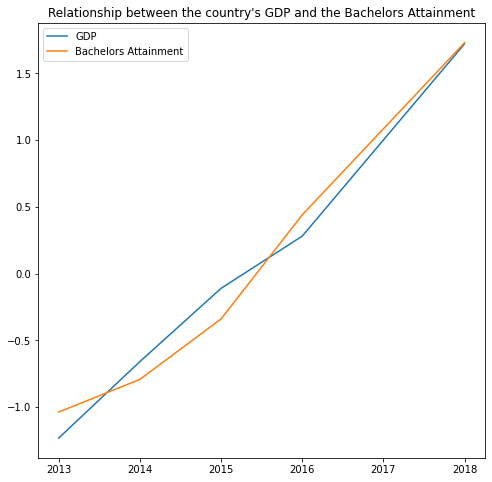

In [ ]:
#gdp vs year w.r.t country
plt.figure(figsize=(8, 8))
usa = df1[(df1['Country Name'] == "United States") & (df1['Year'] > 2012)]
standardizer = StandardScaler()

gdp_standardized = normalizer.fit_transform(usa['GDP_Millions'].to_numpy().reshape(-1, 1))
bach_standardized = normalizer.fit_transform(usa['BachelorsAttainment'].to_numpy().reshape(-1, 1))
plt.plot(usa["Year"], gdp_normalized, label="GDP")
plt.plot(usa["Year"],bach_normalized, label="Bachelors Attainment")
plt.title("Relationship between the country's GDP and the Bachelors Attainment")
plt.legend()
plt.show()


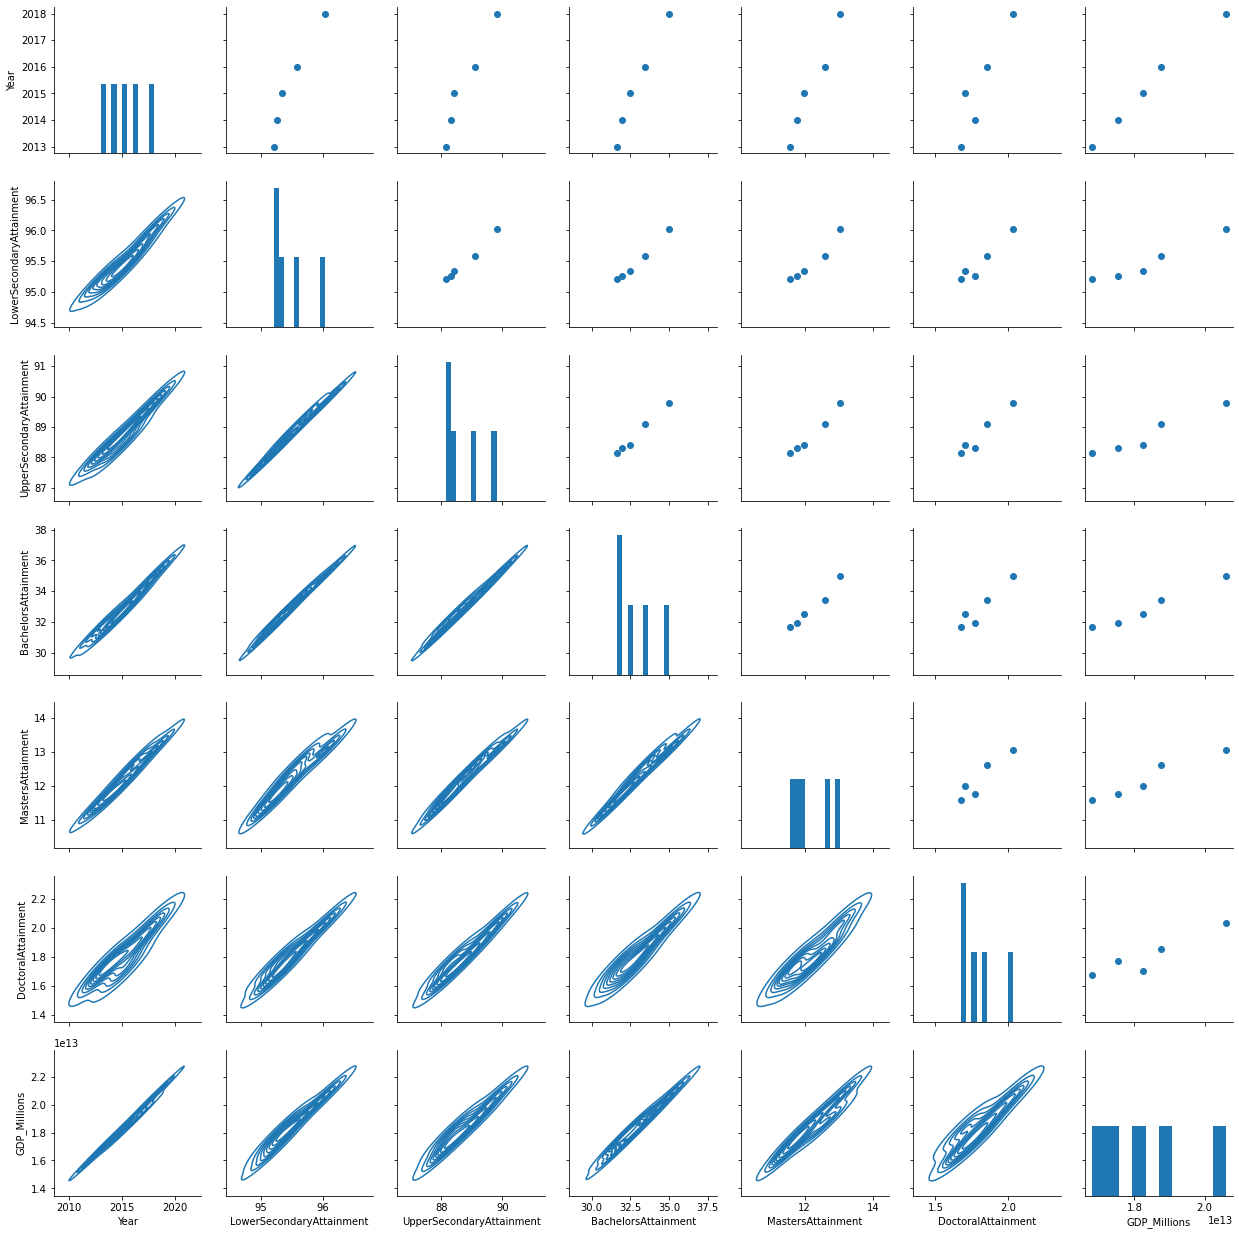

In [ ]:
g = sns.PairGrid(usa)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)